In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-deep')

# Initialize random number generator
np.random.seed(123)

# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0]*X1 + beta[1]*X2 + np.random.randn(size)*sigma

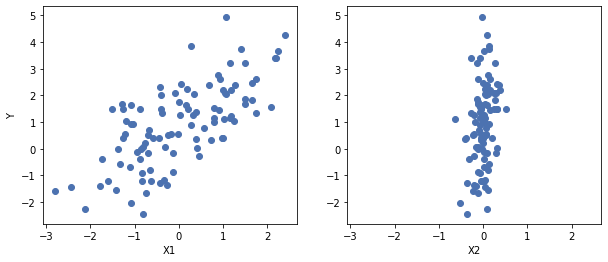

In [2]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,4))
axes[0].scatter(X1, Y)
axes[1].scatter(X2, Y)
axes[0].set_ylabel('Y'); axes[0].set_xlabel('X1'); axes[1].set_xlabel('X2');

In [3]:
import pymc3 as pm
print('Running on PyMC3 v{}'.format(pm.__version__))

Running on PyMC3 v3.7


In [4]:
basic_model = pm.Model()

with basic_model:

    # Priors for unknown model parameters
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta = pm.Normal('beta', mu=0, sigma=10, shape=2)
    sigma = pm.HalfNormal('sigma', sigma=1)

    # Expected value of outcome
    mu = alpha + beta[0]*X1 + beta[1]*X2

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal('Y_obs', mu=mu, sigma=sigma, observed=Y)

In [18]:
with basic_model:
    # draw 500 posterior samples
    trace = pm.sample(10000, chains=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, beta, alpha]
100%|██████████| 10500/10500 [00:06<00:00, 1566.61it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks


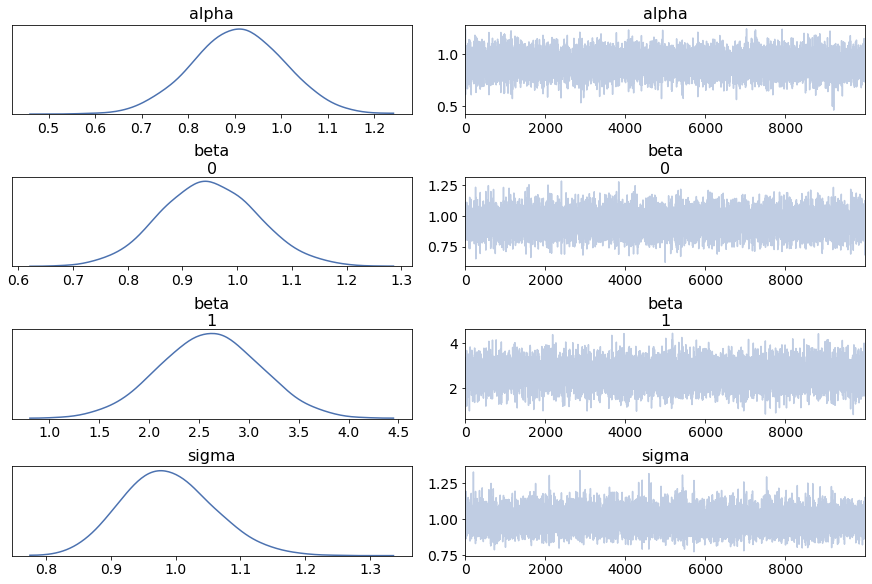

In [19]:
pm.traceplot(trace);

In [20]:
pm.summary(trace).round(2)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
alpha,0.91,0.10,0.0,0.72,1.10
beta__0,0.95,0.09,0.0,0.78,1.12
beta__1,2.61,0.51,0.0,1.65,3.64
sigma,0.99,0.07,0.0,0.86,1.13
